In [1]:
# Plot Surrogate Predictions
from gp_predict import *
import pandas as pd
import numpy as np
from diff_evolution_col import *

In [2]:
ii = 0

# Here, call surrogate model
surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\combined_pd_005_just_good_data'
template_dir = os.path.join(surrogate_dir, 'templatedir_SIM')

surrogate_file = surrogate_dir + r'\SimGpModel.json'
# json_dir = template_dir + r'\scInput.json'
# result_file = template_dir + r'\ops.out'
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'


In [3]:
# load the merged_data.csv file
merged_data = pd.read_csv(surrogate_dir + r'\train_data.csv')

cal_params_index = np.arange(0, 14)
nd_params_index = np.arange(17, 23)

# Extract the calibrated and nondimensional parameters for both training and testing
cal_params_all = merged_data.iloc[:, cal_params_index]
nondim_params_all = merged_data.iloc[:, nd_params_index]


merged_data

,eta1,kappa_k,kappa,sig,lam,mup,sigp,rsmax,n,alpha,...,gamma,name,PeakDrift,FailureType,ar,lrr,srr,alr,sdr,smr
0,0.793067,0.622089,1.035890,0.201992,0.198395,2.371015,1.811930,0.697550,1.817540,0.012094,...,0.179954,"Ang et al. 1985, No. 5",0.039071,Flexure-Shear,0.500000,0.455948,0.007968,0.000000,0.363636,0.778358
1,1.345305,1.167902,1.032582,0.149860,0.165662,3.554978,3.597197,0.978844,2.554040,0.008655,...,0.659643,"Arakawa et al. 1988, No. 27",0.031256,Shear,0.458333,0.477204,0.008038,0.234291,0.480000,0.798056
2,0.772747,0.630167,1.001471,0.077689,0.146220,3.703910,0.803579,0.714506,1.726458,0.013346,...,0.169726,"Ang et al. 1985, No. 6",0.025655,Shear,0.500000,0.448617,0.002866,0.000000,0.900000,0.634716
3,1.003544,0.574342,0.974244,0.401307,0.150498,1.291786,1.320936,0.953338,8.329699,0.003101,...,0.743085,"Arakawa et al. 1987, No. 14",0.033820,Shear,0.916667,0.487458,0.007865,0.237363,0.720000,0.889523
4,0.722820,0.560514,1.002256,0.185571,0.062668,1.758017,2.005158,0.721269,3.982868,0.003115,...,0.547248,"Arakawa et al. 1988, No. 19",0.034996,Shear,0.611111,0.474135,0.000000,0.116392,10.000000,1.268139
5,1.219652,0.500000,1.050000,0.172386,0.128683,2.506570,4.941139,0.886171,5.594427,0.000000,...,0.809944,"Arakawa et al. 1988, No. 23",0.034764,Flexure-Shear,0.611111,0.719298,0.012115,0.176575,0.480000,0.893466
6,1.528132,1.397212,0.990616,0.368537,0.443087,2.197786,2.094278,0.936373,3.729441,0.001274,...,0.300894,"Arakawa et al. 1987, No. 12",0.027192,Shear,0.916667,0.518030,0.000000,0.252250,10.000000,1.258044
7,1.184817,0.908320,0.959475,0.396224,0.256509,0.531340,0.317291,0.830325,1.341692,0.022070,...,0.278082,"McDaniel, 1997, S1",0.024549,Shear,0.219178,0.150928,0.002776,0.000000,0.849057,0.109021
8,1.386556,1.377865,1.047399,0.342784,0.287537,3.432922,1.239678,0.844702,6.351339,0.004548,...,0.210364,"Arakawa et al. 1987, No. 9",0.033723,Shear,0.916667,0.473486,0.007640,0.115280,1.028571,0.744558
9,0.722004,0.500000,1.050000,0.179699,0.074498,0.586256,4.037439,1.000000,2.236048,0.000000,...,0.482514,"Arakawa et al. 1988, No. 17",0.026919,Shear,0.611111,0.471105,0.007935,0.000000,1.028571,0.516112


Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found


TypeError: run_model() got an unexpected keyword argument 'show_plots'

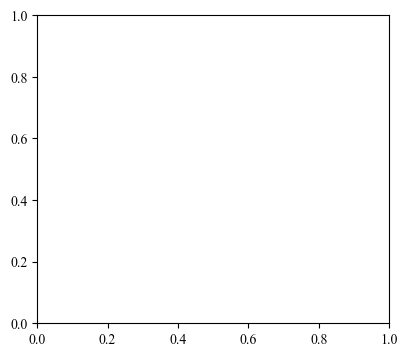

In [4]:
# Find where the input data is
cwd = os.getcwd()
allfiles = os.listdir(os.path.join(cwd, 'calibrated_curves_02'))

for file in allfiles[1::]:
    with open(os.path.join(cwd, 'calibrated_curves_02', file), 'r') as f:
        test_data = json.load(f)
    
    disp = test_data['data']['disp']
    force = test_data['data']['force']
    name = test_data['Name']

    try:
        # Find name in the Name column of the merged_data
        index = merged_data[merged_data['name'] == name].index[0]
    except:
        print('Name not found')
        continue

    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = merged_data.iloc[index, cal_params_index]
    nondim_params = merged_data.iloc[index, nd_params_index]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    params = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
    gp_predicted = []
        
    for vals in params[0]:
        gp_predicted.append(vals)
    
    # Run the model
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    run_model(cal_params, test_data, show_plots=True)
    plt.ylim([-1.1, 1.1])

    # Now, plot the surrogate predictions
    print(gp_predicted)
    plt.subplot(1,2,2)
    run_model(gp_predicted, test_data, show_plots=True)
    plt.ylim([-1.1, 1.1])
    plt.suptitle(test_data['Name'])
    plt.tight_layout()
    plt.show()
    # cc += 1
    print('\n')
    